Boston Housing Dataset, Introductory Exploration
in Python Interactive Notebook
By Brian Lesko 
Using Intro to Statistical Machine Learning with R
converted to python

This exercise is part of an introductory assignment for STAT 6500 and requires usage of the problematic dataset concerning Boston Housing. 

In [31]:
from sklearn import datasets # Importing the library
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Lets Read about the Dataset

In [32]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Lets Inspect what the data looks like.

In [33]:
import pandas as pd
df = pd.DataFrame(boston.data)

df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


Looks like the names were dropped from the dataset when converted to a Dataframe from Pandas. I will try and correct this in the next step.

Next, Lets look at how many rows and columns of data are in the Boston Dataset

In [34]:
X = boston.data
print(X.shape);

y = boston.target
print(y.shape);

samples = df.shape[0]
features = df.shape[1]
print('num samples=',samples,', num features=',features,sep='') # row count

(506, 13)
(506,)
num samples=506, num features=13


Looks like 506 Rows, one for each home, and 13 columns, or features of the homes were recorded

Lets fix the pandas dataframe conversion

In [35]:
# The correct way to convert boston to a Pandas dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


Lets make some scatterplots of the features, or predictors

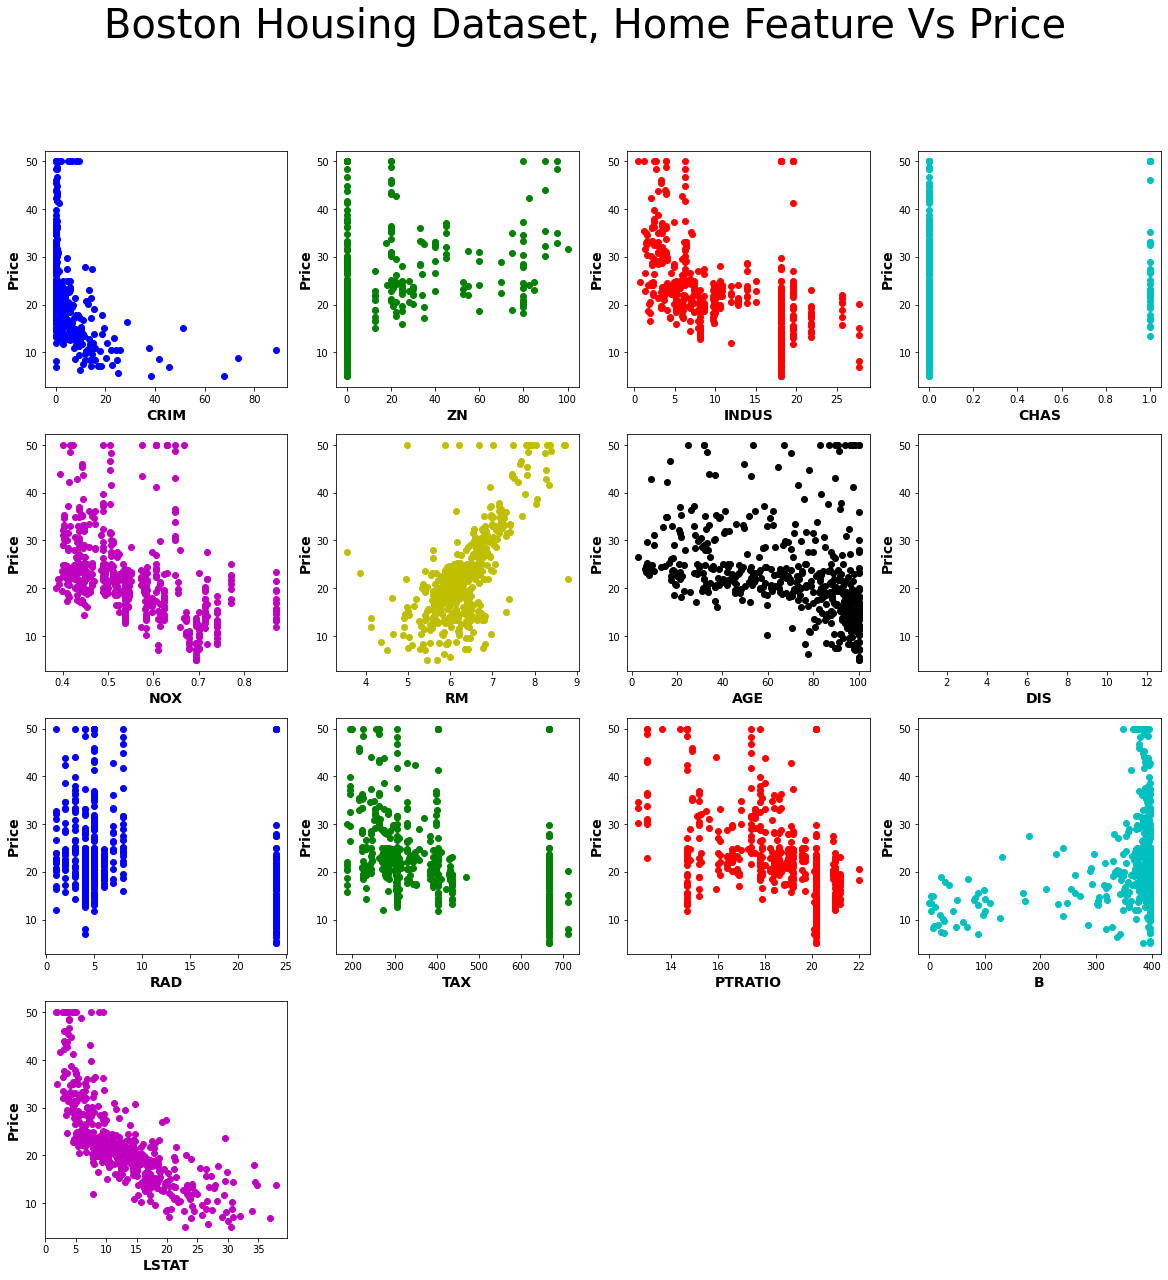

In [36]:
# Importing the matPlot library as plt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# create the figure and the axes objects
fig, axs = plt.subplots(4,4, figsize=(20,20))

# flatten the axes array so only one for loop is needed (avoid nesting)
axs = axs.flatten()

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm']
# iterate over the columns and create a scatter plot for each one
for i, column_name in enumerate(df.columns):
    axs[i].scatter(df[column_name], boston.target, c=colors[i])
    axs[i].set_xlabel(column_name, fontweight='bold', fontsize=14)
    axs[i].set_ylabel('Price', fontweight='bold', fontsize=14)

# Master Title
plt.suptitle("Boston Housing Dataset, Home Feature Vs Price", fontsize=40)
# plt.tight_layout()

# remove the empty axes
fig.delaxes(axs[-1]), fig.delaxes(axs[-2]), fig.delaxes(axs[-3])

plt.show()

Nice, there is a good relationship between some of the features and price of the home. For some variables however, there is not an obvious relationship. Specifically, a linnear relationship would work well for RM while a linear or exponential decay relationship would work for LSTAT. Interestingly, the DIS feature is showing no datapoints, this could be investigated further. Note that the variable LSTAT may be bias in the way data was collected, this likely contributes to the warning that this dataset is problematic

Looking at the CRIM feature using the DESC method of the boston object:

CRIM  :   per capita crime rate by town

The relationship here resembles an exponential decay, suggesting that as crime rate increases the home value decreases. Note that there are also a few other predictors that also have a negative relationship with Price and may thus also correlate with crime rate.

Some of the predictor scatter plots have potential outliers or clusters near the higher end of the range of the predictor, especially tax rate or RAD. 

Some homes bound the Charles River, this info is stored in the dummy variable CHAS

- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)



In [37]:
import numpy as np
x = df['CHAS']
samples = df.shape[0]
countOnRiver = np.mean(x==1)*samples
print('There are',countOnRiver, 'homes on the Charles river')

There are 35.0 homes on the Charles river


The Median pupil-teacher ration among the towns in this dataset

In [38]:
pupilTeacherMedian = np.median(df['PTRATIO'])
print('The Median Pupil Teacher ratio among the homes is',pupilTeacherMedian)

The Median Pupil Teacher ratio among the homes is 19.05


The Lowest median Value of owner occupied homes. This homes other feature values are, which compare lie where in the range for each feature

MEDV     Median value of owner-occupied homes in $1000's

In [39]:
#x = df['MEDV']
#minValue = np.min(x)
X = boston.data
boston.feature_names
print(X.shape);



(506, 13)


Seems that the data is missing the MEDV Home Values. 

Lets investigate rooms per dwelling, RM

In [40]:
x = df['RM']
countHomesWithOver7Rooms = np.mean(x>7)*samples
print('there are',countHomesWithOver7Rooms,'homes with more than 7 rooms')

countHomesWithOver8Rooms = np.mean(x>8)*samples
print('there are',countHomesWithOver8Rooms,'homes with more than 8 rooms')

there are 63.99999999999999 homes with more than 7 rooms
there are 13.0 homes with more than 8 rooms


There are only 13 homes out of 506 homes with more than 8 rooms! this is ~ 2.5% of the sample. 

For the next portion of the assignment, the prompt asks to predict crime rate (the target or response) based on the other features. This could lead to a deeper understanding of how this datasest or the associated Boston area is problematic

First, Lets create a method to return the RSS coefficients and R^2 values for a given pair

In [41]:
def fit_linear(x,y):

    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    
    # Simple Linear Regression 3.1
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    r_squared = syx**2/sxx/syy
      # r sqaured is between 0 and 1 and is independent to the units of Y
      # is the proportion of variance explained
      # also is a measure of the linear relationship between X and Y 

    # Assessing accuracy of Coefficient Estimates 3.1.2
    y_predicted = beta0 + beta1*x
    RSS = np.sum((y-y_predicted)**2)
    RSE = (RSS/(n-2))**(1/2) 
      # RSE is an estimate of the standard deviation of the error, e
      # also considered a measure of the lack of fit of a model to the data
      # measured in the units of y
      # yields varianceEstimate = RSE^2
    # Standard Errors
    SE_beta0_estimate = RSE^2 * ( (1/n)+ (xm**2)/sxx )
    SE_beta1_estimate = (RSE^2/sxx)**(1/2)

    # Confidence Intervals
    CI_95_beta1 = [beta1 - 2*SE_beta1_estimate , beta1 + 2*SE_beta1_estimate]
    CI_95_beta0 = [beta0 - 2*SE_beta0_estimate , beta0 + 2*SE_beta0_estimate]
      # Interpretation: There is approximately a 95% chance that the interval will contain the true value of B

    # Hypothesis Tests on the coefficients 
      # H0 : There is no relationship between X and Y 
        # B = 0
      # Ha : There is some relationship between X and Y 
        # B =! 0
    t = (beta1 - 0)/SE_beta1_estimate # t statistic, the measure of standard deviations that beta1 is away from 0
    significant = 0
    if t>2
      significant = 1 # at the 5% level
      # where the t distribution is bell shaped, and n>30 is very simuilar to the standard normal distribution
    # assuming n=30, for alpha = 5%, the t value needs to be 2 or greater
    # for alpha = 1%, the t value needs to be 2.75 or greater

    # Assessing the Accuracy of the Model 3.1.3
    # Interpretation of RSE, R^2, etc

    # print(beta0,beta1,rsq)

    return beta0, beta1, r_squared

Now lets combine the plotting code above with the RSS method defined directly above

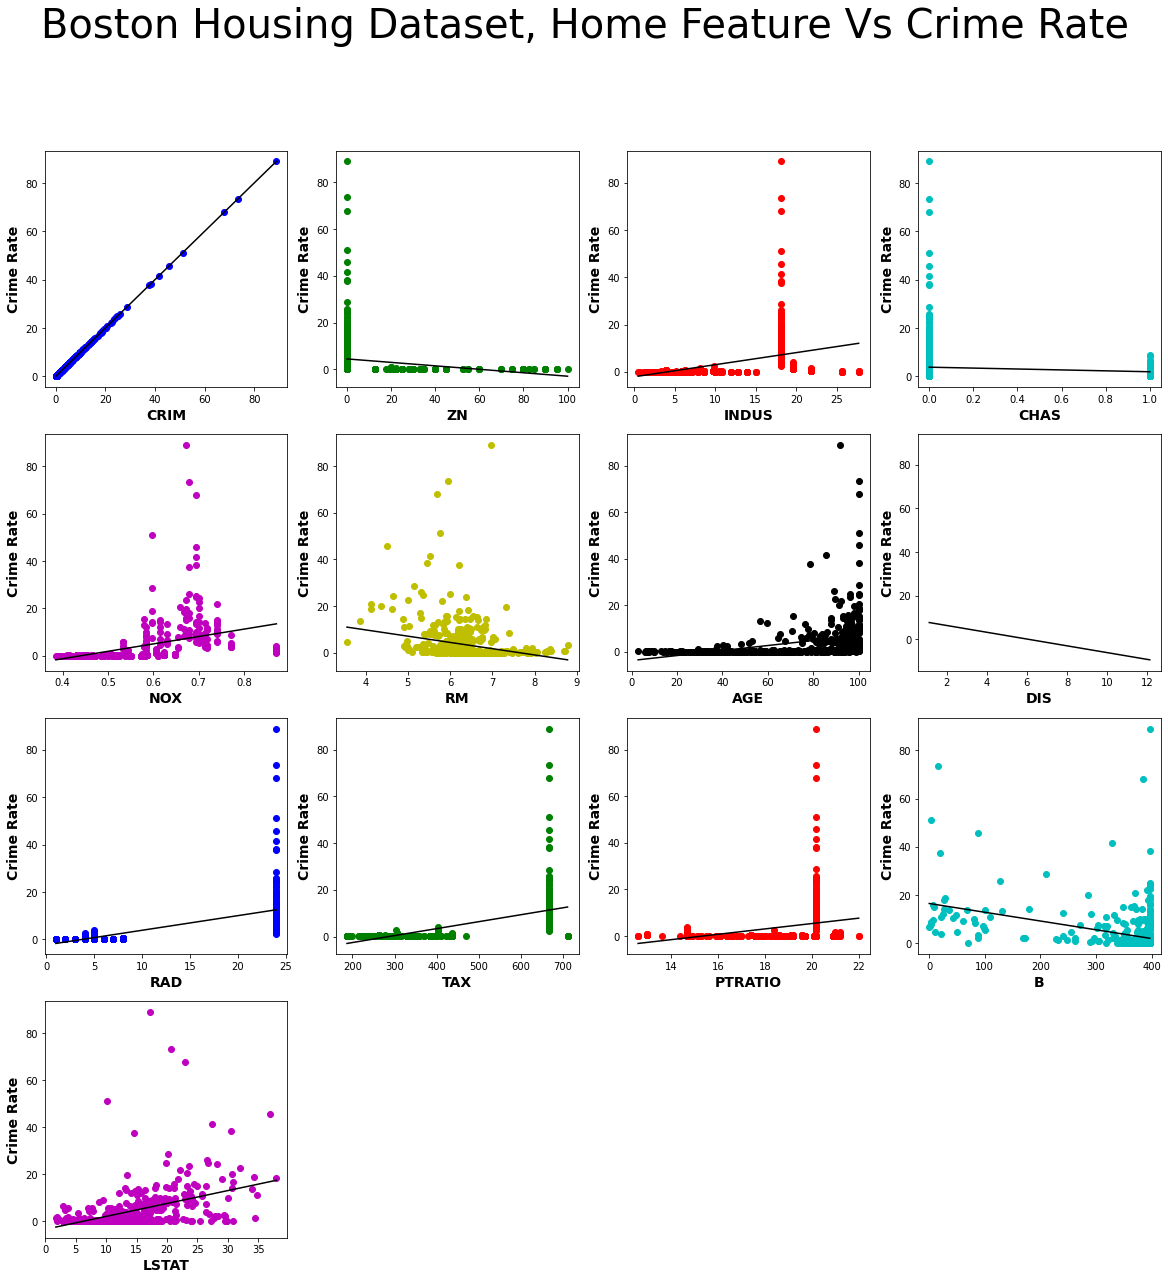

In [42]:
# Setting the new y variable
y = df['CRIM']

# create the figure and the axes objects
fig, axs = plt.subplots(4,4, figsize=(20,20))

# flatten the axes array so only one for loop is needed (avoid nesting)
axs = axs.flatten()

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm']
# iterate over the columns and create a scatter plot for each one
betaSingleRegression = []
for i, column_name in enumerate(df.columns):
    # Plotting The datapoints
    axs[i].scatter(df[column_name], y, c=colors[i])

    # Calculating the Least Squares RSS
    x = df[column_name]
    isValid = x.notna()
    beta0 , beta1 , rsq = fit_linear(x[isValid],y[isValid])

    # Plotting the Least Squared Linear Regression Line
    xL = np.linspace(np.min(x),np.max(x),100)
    yL = beta0 + beta1*xL
    axs[i].plot(xL,yL,'k')

    axs[i].set_xlabel(column_name, fontweight='bold', fontsize=14)
    axs[i].set_ylabel('Crime Rate', fontweight='bold', fontsize=14)
    betaSingleRegression.append(beta1)

# Master Title
plt.suptitle("Boston Housing Dataset, Home Feature Vs Crime Rate", fontsize=40)
# plt.tight_layout()

# remove the empty axes
fig.delaxes(axs[-1]), fig.delaxes(axs[-2]), fig.delaxes(axs[-3])

plt.show()

These plots show that certain properties are grouped in problematic ways! One of the highest tax rates has increasing crime rate. The same pattern appears with a group of pupil teach ratio, RAD, INDUS, and ZN. Among the other categories, the strength of linear relationships is questionable at best. 

# Lets try Multiple Regression Next

The Data of Interest, predicting crime rate

```
# This is formatted as code
```



In [43]:
# The X matrix of Features 
x_namesold = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
xNamesNew = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = np.array(df[xNamesNew])
oldTarget = boston.target
X = np.c_[X, oldTarget]
print(X.shape);

# The target
y = np.array(df['CRIM'])
print(y.shape);

(506, 13)
(506,)


The intercept coefficient, Beta0 is 17.033
The other coefficients of Beta are: 0.045 -0.064 -0.749 -10.314 0.430 0.001 -0.987 0.588 -0.004 -0.271 -0.008 0.126 -0.199 

R^2 = 0.454010


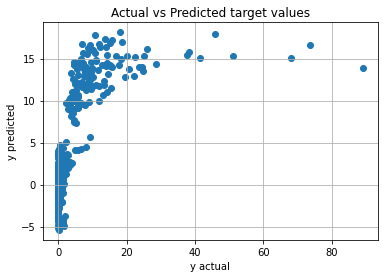

In [44]:
def multiple_variable_linear_regression(X, y):
    # Using sklearn package 
    # alternate method :  manual computation of coefficients
    # nsamp = y.shape[0]
    # ones = np.ones((nsamp,1))
    # A = np.hstack((ones,X))
    # least squares method for the loss function (lstsq method)
    # out = np.linalg.lstsq(A,y,rcond=None)
    # beta = out[0]
    # print('The Coefficients using the least squares method are',beta)
    from sklearn import linear_model
    import numpy as np
    import matplotlib.pyplot as plt

    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    # printing 
    print("The intercept coefficient, Beta0 is {0:.3f}".format(regr.intercept_), end='\n')
    print("The other coefficients of Beta are:", end=' ')
    for coef in regr.coef_:
        print("{0:.3f}".format(coef), end=' ')
    print('\n')

    # RSS/n and R^2
    y_pred = regr.predict(X)
    nRSS = np.mean((y_pred - y)**2)
    Rsq = 1 - nRSS / (np.std(y)**2)
    print("R^2 = {0:f}".format(Rsq))

    # Calculate the p-values for each Beta using statsmodels
    import statsmodels.api as sm
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()
    p_values = results.pvalues[1:] # Extract the p-values of the predictors (excluding the constant)
    # Colors
    colors2 = []
    for p in p_values:
        if p < 0.05:
            colors2.append('green')
        else:
            colors2.append('lightgreen')

    # Scatter Plot
    plt.scatter(y, y_pred) # , c=colors)
    plt.xlabel('y actual')
    plt.ylabel('y predicted')
    plt.grid()
    plt.title('Actual vs Predicted target values')

multiple_variable_linear_regression(X, y)

The predictions here are pretty bad! which is somewhat surprising

#### For which predictors can we reject the null hypothesis? H0: Bj = 0
The p-values of each predictor can be obtained by running a multiple linear regression and using statsmodels package, which provides a summary of the regression results including the p-values for each predictor. If the p-value of a predictor is less than a significance level (usually 0.05), you can reject the null hypothesis H0: βj = 0 and conclude that the predictor is significant.


How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [45]:
nsamp = y.shape[0]
ones = np.ones((nsamp,1))
A = np.hstack((ones,X))
# least squares method for the loss function (lstsq method)
out = np.linalg.lstsq(A,y,rcond=None)
beta = out[0]

#Crime rate to predict price beta
beta0 , beta_price , rsq = fit_linear(boston.target,df['CRIM'])
betaSingleRegression.append(beta_price)

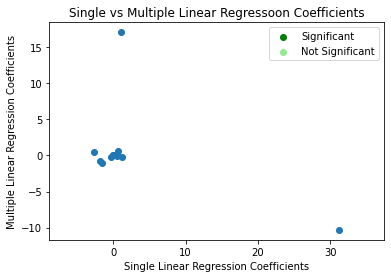

In [46]:
#Plotting 
plt.scatter(betaSingleRegression,beta)
plt.xlabel('Single Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.title('Single vs Multiple Linear Regressoon Coefficients')
plt.axis('equal')
significant = plt.scatter([],[],c='green', label='Significant')
not_significant = plt.scatter([],[],c='lightgreen', label='Not Significant')
plt.legend(handles=[significant, not_significant])

A lot of the variables are clustered around zero, but for two of the types, the coefficients are very different

(506, 13)


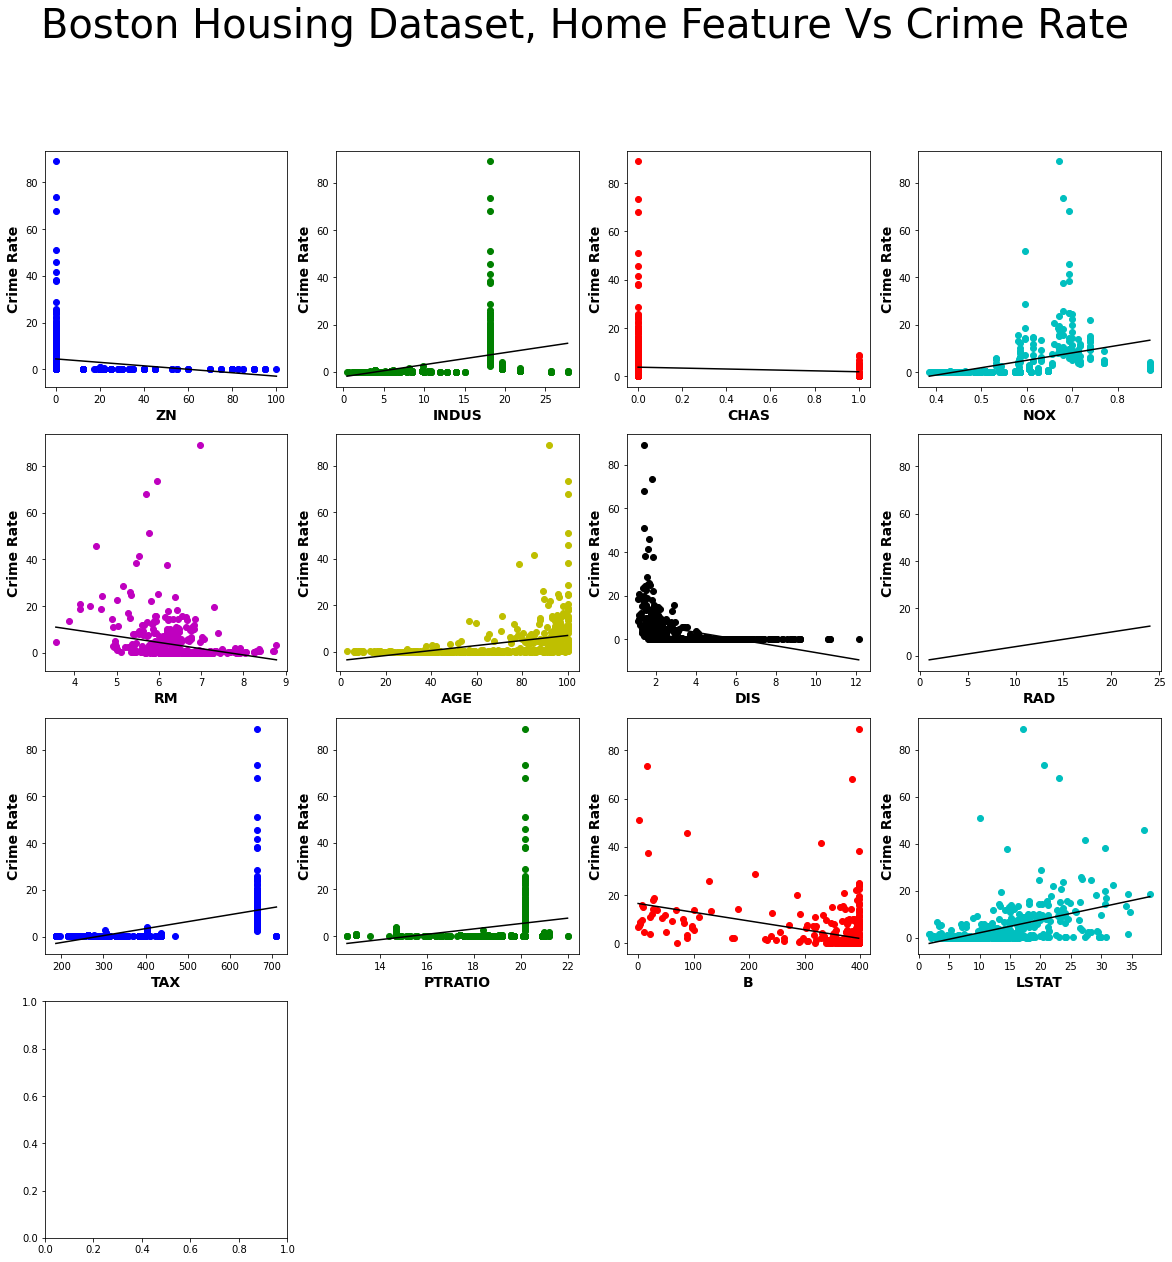

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# The X matrix of Features 
x_namesold = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
xNamesNew = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = np.array(df[xNamesNew])
oldTarget = boston.target
X = np.c_[X, oldTarget]
print(X.shape);
y = df['CRIM']

# create the figure and the axes objects
fig, axs = plt.subplots(4,4, figsize=(20,20))

# flatten the axes array so only one for loop is needed (avoid nesting)
axs = axs.flatten()


# iterate over the columns and create a scatter plot for each one
betaSingleRegression = []
p_values = []
for i, column_name in enumerate(xNamesNew):
    # Plotting The datapoints
    axs[i].scatter(df[column_name], y, c=colors[i])

    # Calculating the Least Squares RSS
    x = X[:, i]
    beta0 , beta1 , rsq = fit_linear(x,y)

    # Plotting the Least Squared Linear Regression Line
    xL = np.linspace(np.min(x),np.max(x),100)
    yL = beta0 + beta1*xL
    axs[i].plot(xL,yL,'k')

    axs[i].set_xlabel(column_name, fontweight='bold', fontsize=14)
    axs[i].set_ylabel('Crime Rate', fontweight='bold', fontsize=14)
    betaSingleRegression.append(beta1)

    # Calculate p-value for the coefficient
    _, p_value = stats.pearsonr(x, y)
    p_values.append(p_value)

# Master Title
plt.suptitle("Boston Housing Dataset, Home Feature Vs Crime Rate", fontsize=40)
# plt.tight_layout()

# remove the empty axes
fig.delaxes(axs[-1]), fig.delaxes(axs[-2]), fig.delaxes(axs[-3])

plt.show()

In [53]:
print(p_values)

[5.506472107678028e-06, 1.4503489330269128e-21, 0.20943450153515702, 3.751739260356088e-23, 6.346702984686082e-07, 2.8548693502432535e-16, 8.519948766925019e-19, 2.6938443981854005e-56, 2.357126835256098e-47, 2.942922447359195e-11, 2.4872739737731073e-19, 2.6542772314727383e-27]


In [54]:
#Fit a polynomial form for X and y
# plot the results 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features of degree 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
regressor = LinearRegression()
regressor.fit(X_poly, y)

# Predict the target values using the polynomial regression model
y_pred = regressor.predict(X_poly)


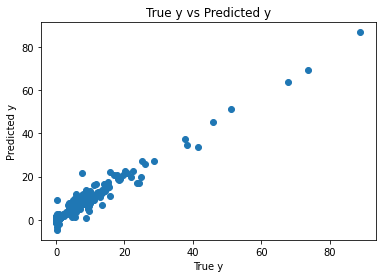

In [56]:
# Plot the predicted y against the true y
plt.scatter(y, y_pred)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('True y vs Predicted y')
plt.show()

This serves as evidence of non linearity as the polynomial model is much more accurate than the multiple linear regression model